# Análise de Vendas, Produtos e Clientes

Neste projeto, realizaremos uma análise geral dos dados de vendas, com foco em aspectos amplos que ajudarão a entender o desempenho da empresa, mas com a possibilidade de aprofundar as análises em níveis mais granulares. A partir dos dados fornecidos, realizaremos as seguintes análises iniciais:

1. **Análise da Receita ao Longo do Tempo**: Examinaremos a evolução da receita de forma mensal e anual, destacando tendências gerais e períodos de alta ou baixa performance.
2. **Análise de Receita por Marca**: Investigaremos a distribuição de receita entre diferentes marcas, permitindo entender quais são as mais lucrativas em termos gerais.
3. **TOP 5 Países em Receita**: Analisaremos a distribuição geográfica das vendas, com foco nas regiões que contribuem mais para a receita total.
4. **Top 5 Lojas em Receita**: Identificaremos as cinco lojas com maior receita, oferecendo uma visão geral dos pontos de venda mais rentáveis.
5. **Análise de Produtos Acima da Média em Receita**: Avaliaremos os produtos que estão gerando receitas acima da média, identificando os itens de melhor desempenho.
6. **Análise de Clientes Acima e Abaixo da Média em Receita**: Segmentar os clientes com base na receita gerada, classificando-os como "Acima" ou "Abaixo" da média, para identificar potenciais oportunidades de melhoria.

Essas análises iniciais fornecem uma visão geral do desempenho da empresa, mas a partir delas, é possível realizar investigações mais profundas, explorando variáveis como produtos específicos, segmentos de clientes ou tendências temporais mais detalhadas, permitindo uma compreensão mais granular e precisa do comportamento do negócio.

<br><br>

## Importação e Tratamento dos Dados

Neste projeto, os dados foram importados de diversos arquivos CSV, incluindo informações sobre vendas, clientes, produtos, lojas e promoções. Durante o processo de importação, foram aplicados ajustes como a definição do separador de campos (`sep=';'`), o formato decimal (`decimal=','`) e a codificação correta dos caracteres (`encoding='ISO-8859-1'`), garantindo que os dados fossem lidos corretamente.

Após a importação, realizamos o tratamento dos dados para garantir que estivessem prontos para análise. Isso incluiu a conversão das datas para o formato datetime, a remoção de colunas desnecessárias, e a criação de novas colunas, como o "Ano" e "Mês" das vendas, para facilitar análises temporais. Também corrigimos nomes de colunas e consolidamos informações, como o nome completo dos clientes, a fim de garantir que os dados estivessem organizados e focados nos aspectos relevantes para as análises subsequentes.


In [1075]:
import pandas as pd
import matplotlib.pyplot as plt

# IMPORTANDO OS DADOS (DATAFRAME) PARA O PYTHON --------------------------------------------------------------------------------
#encoding='latin1', encoding='ISO-8859-1', encoding='utf-8', encoding='cp1252'
vendas_df = pd.read_csv(r'Contoso - Vendas - 2017.csv', sep=';', decimal=',', encoding='ISO-8859-1')
clientes_df = pd.read_csv(r'Contoso - Clientes.csv', sep=';', decimal=',', encoding='ISO-8859-1')
produtos_df = pd.read_csv(r'Contoso - Cadastro Produtos.csv', sep=';', decimal=',', encoding='ISO-8859-1')
lojas_df = pd.read_csv(r'Contoso - Lojas.csv', sep=';', decimal=',', encoding='ISO-8859-1')
promocoes_df = pd.read_csv(r'Contoso - Promocoes.csv', sep=';', decimal=',', encoding='ISO-8859-1')


# TRATAMENTO DOS DADOS (DATAFRAME) ---------------------------------------------------------------------------------------------

vendas_df['Data da Venda'] = pd.to_datetime(vendas_df['Data da Venda'], format="%d/%m/%Y")
vendas_df = vendas_df.drop(['Data do Envio' , 'ID Canal'], axis=1)
vendas_df['Ano'] = vendas_df['Data da Venda'].dt.year
vendas_df['Mes'] = vendas_df['Data da Venda'].dt.month


clientes_df = clientes_df.rename(columns={'ÿID Cliente': 'ID Cliente'})
clientes_df['Nome Completo'] = clientes_df['Primeiro Nome'] + ' ' + clientes_df['Sobrenome']
clientes_df = clientes_df[['ID Cliente', 'Nome Completo', 'E-mail']]    # , 'Genero'


produtos_df = produtos_df.rename(columns={'ÿNome do Produto': 'Nome do Produto'})
produtos_df = produtos_df[['ID Produto', 'Nome do Produto', 'Nome da Marca', 'Tipo', 'Custo Unitario', 'Preco Unitario']]


lojas_df = lojas_df.rename(columns={'ÿID Loja': 'ID Loja'})
lojas_df = lojas_df.drop(['Quantidade Colaboradores'], axis=1)


promocoes_df = promocoes_df.rename(columns={'ÿID Promocao': 'ID Promocao'})
promocoes_df = promocoes_df[['ID Promocao', 'Percentual Desconto']]


## Realizando Join entre as Tabelas e Criando Colunas Adicionais

No processo de integração dos dados, fizemos **joins** entre o DataFrame de vendas (`vendas_df`) e outras tabelas para enriquecer as informações. A primeira operação uniu os dados de vendas com as promoções, utilizando a chave `'ID Promocao'`. Em seguida, juntamos as informações de produtos, lojas e clientes, usando as chaves `'ID Produto'`, `'ID Loja'` e `'ID Cliente'`, respectivamente. Após cada join, removemos as colunas de ID para evitar redundância nos dados.

Além disso, criamos novas colunas para melhorar as análises. A coluna **"Quantidade Entregue"** foi calculada subtraindo a quantidade devolvida da quantidade vendida. A **"Receita"** foi calculada multiplicando a quantidade entregue pelo preço unitário, aplicando o desconto promocional. Por fim, foi criada a coluna **"Ano-Mes"** para agrupar as vendas por período, facilitando a análise temporal.


In [1076]:
# FAZENDO JOIN ENTRE AS TABELAS -----------------------------------------------------------------------------------------------------------------

# Join entre vendas_df e promocoes_df 
vendas_df = vendas_df.merge(promocoes_df, on='ID Promocao', how='left')
vendas_df = vendas_df.drop(['ID Promocao'], axis=1)

# Join entre vendas_df e produtos_df
vendas_df = vendas_df.merge(produtos_df, on='ID Produto', how='left')
vendas_df = vendas_df.drop(['ID Produto'], axis=1)

# Join entre vendas_df e lojas_df
vendas_df = vendas_df.merge(lojas_df, on='ID Loja', how='left')
vendas_df = vendas_df.drop(['ID Loja'], axis=1)

# Join entre vendas_df e clientes_df
vendas_df = vendas_df.merge(clientes_df, on='ID Cliente', how='left')
vendas_df = vendas_df.drop(['ID Cliente'], axis=1)


# CRIANDO COLUNAS EXTRAS ------------------------------------------------------------------------------------------------------------------------

# QUANTIDADE ENTREGUE = Quantidade Vendida - Quantidade Devolvida
vendas_df['Quantidade Entregue'] = vendas_df['Quantidade Vendida'] - vendas_df['Quantidade Devolvida']

# RECEITA = Quantidade Entregue * Preco Unitario * ( 1 - Percentual Desconto )
vendas_df['Receita'] = (vendas_df['Quantidade Entregue'] * vendas_df['Preco Unitario'] * (1 - vendas_df['Percentual Desconto']))

# ANO-MES = Coluna ano-mês
vendas_df['Ano-Mes'] = vendas_df['Data da Venda'].dt.to_period('M')

#display(vendas_df.head()) Para visualizar o dataframe resultante, descomente esse código e execute o programa.


## Análise da Receita ao Longo do Tempo

Evolução mensal da receita para identificar padrões de crescimento e sazonalidade. A análise agrupa as receitas por mês e ano, calcula a receita em milhões e determina a taxa de crescimento percentual mensal. Esses dados facilitam a visualização das flutuações e tendências de receita ao longo do tempo, fornecendo insights sobre o desempenho financeiro em cada período.

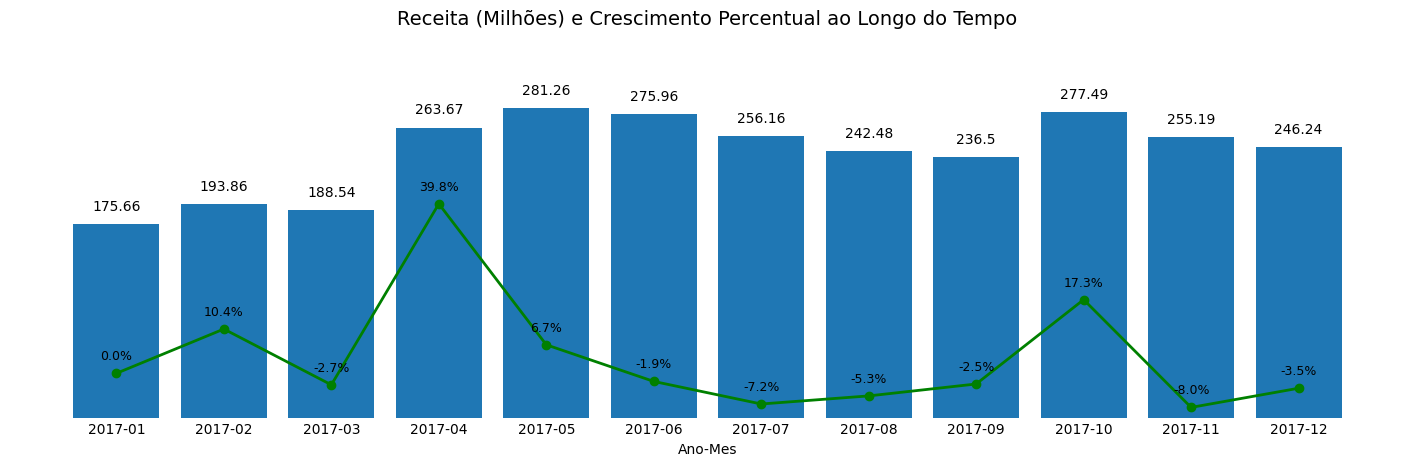

In [1077]:
# RECEITA AO LONGO DO TEMPO --------------------------------------------------------------------------------------------------------------------------------------------

# Agrupando por 'Ano-Mes', somando a receita e criando uma nova coluna de Receita em milhões
receita_por_tempo = vendas_df.groupby('Ano-Mes', as_index=False)['Receita'].sum()
receita_por_tempo['Receita - Milhoes'] = round(receita_por_tempo['Receita'] / 1_000_000, 2)

# Criando coluna de 'Crescimento %'
receita_por_tempo['Crescimento (%)'] = round(receita_por_tempo['Receita'].pct_change() * 100, 1).fillna(0)
    # pct_change() - calcula a diferença percentual entre o valor atual e o valor anterior
    # fillna(0) -  substitui o NaN por 0

# display(receita_por_tempo) # Se quiser visualizar o resultado em formato de tabela, descomente essa linha e rode o código.

# CRIANDO GRÁFICO DE RECEITA AO LONGO DO TEMPO ------------------------------------------------------------------------------------------------------------------------

fig, ax1 = plt.subplots(figsize=(18, 5)) # Criando o gráfico
ax1.bar(receita_por_tempo['Ano-Mes'].astype(str), receita_por_tempo['Receita - Milhoes']) # Plotando as barras (Receita) no Y principal (ax1)

# Configuração do eixo XY da Receita
ax1.set_xlabel('Ano-Mes') # Nome Eixo X
ax1.tick_params(length=0) # Deixando os detalhes do eixo em tamanho = 0, para não aparecer.
ax1.set_frame_on(False) # Tirando as bordas
ax1.set_yticks([0, 350]) # Ajustando tamanho do eixo Y principal
ax1.set_yticklabels([]) # Deixando o nome do Eixo Y principal "vazio".

# Adicionando os rótulos da Receita (barras)
for i, receita in enumerate(receita_por_tempo['Receita - Milhoes']):
    ax1.annotate(f'{receita}', (receita_por_tempo['Ano-Mes'].astype(str)[i], receita), textcoords='offset points', xytext=(0, 10), ha='center', fontsize=10)

# Criando o eixo secundário (ax2) para o Crescimento %
ax2 = ax1.twinx() # Eixo Y secundário usando o mesmo eixo X do principal.

# Configuração do eixo XY do Crescimento (linha)
ax2.plot(receita_por_tempo['Ano-Mes'].astype(str), receita_por_tempo['Crescimento (%)'], color='g', marker='o', label='Crescimento (%)', linewidth=2)
ax2.tick_params(length=0)
ax2.set_frame_on(False)
ax2.set_yticks([-10, 80])
ax2.set_yticklabels([])

# Adicionando os rótulos do Crescimento
for i, crescimento in enumerate(receita_por_tempo['Crescimento (%)']):
    ax2.annotate(f'{crescimento:.1f}%', (receita_por_tempo['Ano-Mes'].astype(str)[i], crescimento), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9)

# Título e exibição do gráfico
plt.title('Receita (Milhões) e Crescimento Percentual ao Longo do Tempo', fontsize=14)

plt.show()

#### Resumo dos Resultados - Receita (Milhoes) e Crescimento Percentual ao Longo do Tempo

Ao longo de 2017, a receita mensal apresentou variações expressivas, refletindo tanto períodos de forte crescimento quanto quedas notáveis. Janeiro iniciou com uma receita de 175,66 milhões, que cresceu rapidamente em fevereiro (10,4%) e alcançou um pico significativo em abril, com um aumento de 39,8%. No entanto, os meses seguintes trouxeram flutuações, com um leve declínio em junho (-1,9%) e quedas mais acentuadas entre julho e setembro, chegando a -7,2% em julho. Outubro marcou uma recuperação importante, com um crescimento de 17,3%, mas foi seguido novamente por uma retração em novembro (-8,0%) e dezembro (-3,5%). 

Esses resultados sugerem uma sazonalidade marcante, com períodos de alta demanda intercalados com desacelerações, possivelmente ligadas a fatores sazonais ou promocionais ao longo do ano.

---

<br><br>

## Análise de Receita por Marca

Esta análise examina a receita total gerada por cada marca, permitindo uma visão clara das principais contribuições de receita por marca no período analisado. Os dados foram agrupados e somados para calcular a receita total por marca, convertendo os valores para milhões para facilitar a interpretação. Em seguida, as marcas foram classificadas em ordem decrescente de receita, destacando as líderes de mercado em termos de contribuição financeira.

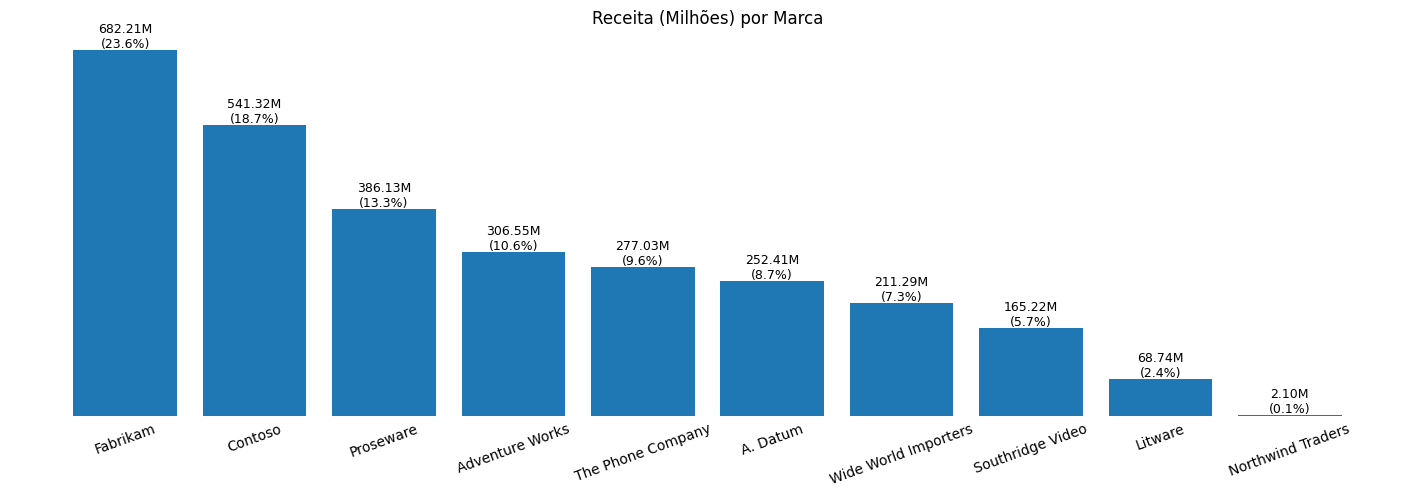

In [1078]:
# RECEITA POR MARCA ----------------------------------------------------------------------------------------------------------------------------------------------------

# Agrupando por Marca, somando a receita e criando uma nova coluna de Receita em milhões
receita_por_marca = vendas_df.groupby('Nome da Marca', as_index=False)['Receita'].sum()
receita_por_marca['Receita - Milhoes'] = round(receita_por_marca['Receita'] / 1_000_000, 2)
receita_por_marca = receita_por_marca.sort_values(by='Receita', ascending=False).reset_index(drop=True) # Ordenando as marcas pela receita em ordem decrescente
total_receita = receita_por_marca['Receita'].sum()
receita_por_marca['% Receita Total'] = round((receita_por_marca['Receita'] / total_receita) * 100, 1)
receita_por_marca['% Receita Total'] 

#display(receita_por_marca) # Se quiser visualizar o resultado em formato de tabela, descomente essa linha e rode o código

# CRIANDO GRÁFICO DE RECEITA POR MARCA ---------------------------------------------------------------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(18, 5))

barras = ax.bar(receita_por_marca['Nome da Marca'], receita_por_marca['Receita - Milhoes'])
rotulos = [f'{receita:.2f}M\n({percentual}%)' for receita, percentual in zip(receita_por_marca['Receita - Milhoes'], receita_por_marca['% Receita Total'])]
ax.bar_label(barras, labels=rotulos, fontsize=9)
ax.set_yticks([])
ax.tick_params(length=0)
ax.set_title('Receita (Milhões) por Marca')
ax.set_frame_on(False)
plt.xticks(rotation=20, ha="center")
plt.show()

#### Resumo dos Resultados - Análise de Receita por Marca

A análise de receita por marca mostra que **Fabrikam** é a líder de forma destacada, com uma receita de **682,21 milhões**, seguida por **Contoso** com **541,32 milhões**. As marcas **Proseware** e **Adventure Works** ocupam as próximas posições, mas com uma diferença significativa para as duas primeiras. A partir da quinta posição, as receitas começam a cair drasticamente, com **The Phone Company** e **A. Datum** apresentando valores mais baixos. As marcas como **Wide World Importers**, **Southridge Video**, **Litware** e **Northwind Traders** geram receitas muito menores, sendo **Northwind Traders** a que apresenta a menor receita, sugerindo um desempenho abaixo das demais.

---
<br><br>

## Análise de TOP 5 Países em Receita

Esta análise explora a distribuição da receita total entre os países, destacando os principais contribuintes para a receita global. Através da agregação da receita por país, foi calculado o valor total de vendas para cada nação e convertido para milhões para facilitar a comparação. Além disso, foi calculado o percentual de cada país em relação à receita total, permitindo identificar quais países possuem maior participação no desempenho financeiro. A análise apresenta os **Top 5 países** com maior receita, oferecendo uma visão clara dos principais mercados geradores de receita.

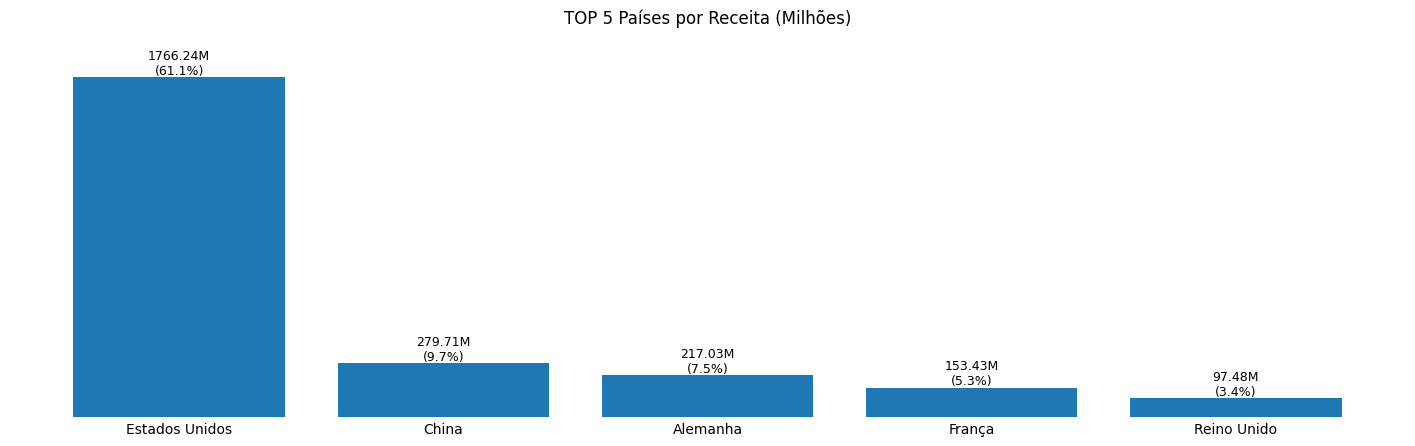

In [1079]:
# RECEITA POR PAIS -----------------------------------------------------------------------------------------------------------------------------------------------------------
receita_por_pais = vendas_df.groupby('País')['Receita'].sum().reset_index()
receita_por_pais['Receita - Milhoes'] = round(receita_por_pais['Receita'] / 1_000_000, 2)
receita_por_pais = receita_por_pais.sort_values(by='Receita', ascending=False).reset_index(drop=True)

# Criando coluna de %Receita Total
total_receita = receita_por_pais['Receita'].sum()
receita_por_pais['% Receita Total'] = round((receita_por_pais['Receita'] / total_receita) * 100, 1)

# Exibindo os TOP 5 países com maior receita
top5_receita_pais = receita_por_pais.head(5)

#display(top5_receita_pais)  # Se quiser visualizar o resultado em formato de tabela, descomente essa linha e rode o código

# CRIANDO GRÁFICO DE TOP5 PAIS POR RECEITA -----------------------------------------------------------------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(18, 5)) # Criando gráfico
barras = ax.bar(top5_receita_pais['País'], top5_receita_pais['Receita - Milhoes']) # Plotando as barras
rotulos = [f'{receita:.2f}M\n({percentual}%)' for receita, percentual in zip(top5_receita_pais['Receita - Milhoes'], top5_receita_pais['% Receita Total'])] # Criando os rótulos
ax.bar_label(barras, labels=rotulos, fontsize=9) # Ativando rótulos no gráfico
ax.set_yticks([0, 2000]) # Ajustando tamanho do eixo Y
ax.set_yticks([]) # Deixando o nome do Eixo Y principal "vazio".
ax.tick_params(length=0) # Deixando os parametros dos eixos em tamanho 0, para não aparecer.
ax.set_title('TOP 5 Países por Receita (Milhões)') # Título do gráfico
ax.set_frame_on(False) # Retirando as margens do gráfico
plt.show()

#### Resumo dos Resultados - Análise de Receita por País

A análise de receita por país mostra que **Estados Unidos** é o maior contribuinte, com uma receita de **1766,24 milhões**, representando **61,1%** da receita total. Em seguida, **China** e **Alemanha** têm participações significativas de **9,7%** e **7,5%**, respectivamente. **França** e **Reino Unido** contribuem com **5,3%** e **3,4%**, respectivamente, ficando atrás das principais economias. A distribuição de receita indica uma grande concentração de vendas nos Estados Unidos, com as demais nações apresentando percentuais consideravelmente menores.

---
<br><br>

## Análise TOP 5 Lojas em Receita

Esta análise apresenta o top 5 das lojas com maior receita, com base nos dados de vendas da empresa. A análise foi realizada agrupando as vendas por loja e somando a receita de cada uma. Para facilitar a leitura, a receita de cada loja foi convertida para milhões e ordenada de forma decrescente. Além disso, foi calculado o percentual da receita de cada loja em relação ao total da empresa, permitindo identificar as principais responsáveis pela performance financeira. A seguir, são apresentados os resultados das 5 lojas que se destacam pela maior contribuição para a receita total.

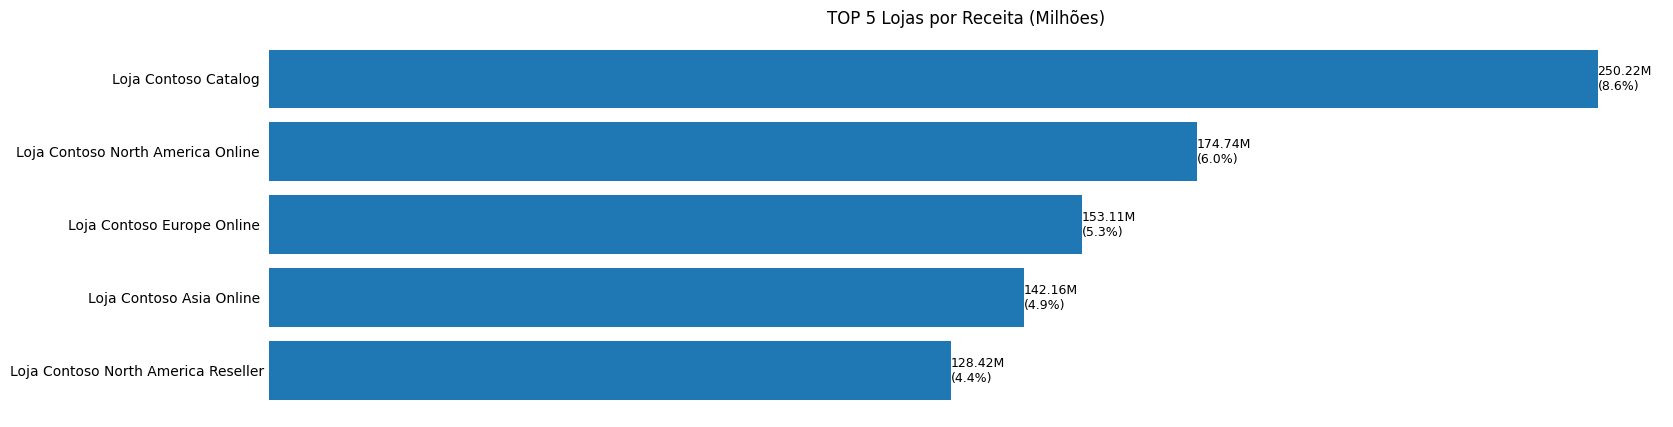

In [1080]:
# TOP 5 LOJAS EM RECEITA ----------------------------------------------------------------------------------------------------------------------------------------------

# 01: Agrupando por loja, somando a receita e criando uma nova coluna de Receita em milhões
receita_por_loja = vendas_df.groupby('Nome da Loja')['Receita'].sum().reset_index()
receita_por_loja['Receita - Milhoes'] = round(receita_por_loja['Receita'] / 1_000_000, 2)
receita_por_loja = receita_por_loja.sort_values(by='Receita', ascending=False).reset_index(drop=True) # Ordenando as lojas pela receita em ordem decrescente

# Criando coluna de %Receita Total
total_receita = receita_por_loja['Receita'].sum()
receita_por_loja['% Receita Total'] = round((receita_por_loja['Receita'] / total_receita) * 100, 1)

# 03: Pegando o top5 lojas pela receita em ordem dcrescente
top_5_receita_por_loja = receita_por_loja.head(5)

#display(top_5_receita_por_loja) # Se quiser visualizar o resultado em formato de tabela, descomente essa linha e rode o código

# CRIANDO GRÁFICO DE TOP5 LOJAS POR RECEITA --------------------------------------------------------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(18, 5)) # Criando gráfico
barras = ax.barh(top_5_receita_por_loja['Nome da Loja'], top_5_receita_por_loja['Receita - Milhoes'])
rotulos = [f'{receita:.2f}M\n({percentual}%)' for receita, percentual in zip(top_5_receita_por_loja['Receita - Milhoes'], top_5_receita_por_loja['% Receita Total'])] # Criando os rótulos
ax.bar_label(barras, labels=rotulos, fontsize=9)
ax.set_xticks([])
ax.tick_params(axis='y', length=0)
ax.set_title('TOP 5 Lojas por Receita (Milhões)')
ax.set_frame_on(False)
ax.invert_yaxis()
plt.show()


#### Resumo dos Resultados - TOP5 Lojas por Receita

A análise de TOP5 lojas por receita mostra que **Loja Contoso Catalog** gerou a maior receita, com **250,22 milhões**, representando **8,6%** da receita total. Em seguida, a **Loja Contoso North America Online** obteve **174,74 milhões** (6% da receita total), enquanto a **Loja Contoso Europe Online** contribuiu com **153,11 milhões** (5,3%). A **Loja Contoso Asia Online** teve uma receita de **142,16 milhões** (4,9%) e, por último, a **Loja Contoso North America Reseller** alcançou **128,42 milhões**, correspondendo a **4,4%** da receita total. Cada loja tem uma atuação distinta, com a Loja Catalog liderando, seguida pelas operações online nas regiões da América do Norte, Europa e Ásia, além da loja de revenda na América do Norte.

---
<br>
<br>

## Análise de Produtos Acima da Média em Receita

Nesta análise, examinamos os produtos com desempenho superior à média de receita, a fim de identificar os itens que estão gerando resultados excepcionais. Para isso, calculamos a média de receita de todos os produtos e classificamos cada um conforme seu desempenho em relação a esse valor de referência. Produtos que apresentaram receita superior à média foram destacados como de alto desempenho, enquanto os que ficaram abaixo da média foram identificados como de desempenho inferior. A seguir, apresentamos a análise detalhada, incluindo o número de produtos que estão acima e abaixo da média de receita.


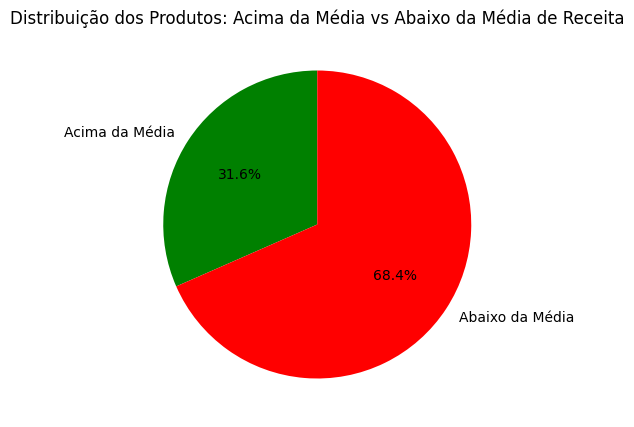

In [1081]:
# ANALISE DE PRODUTOS ACIMA DA MÉDIA EM RECEITA -------------------------------------------------------------------------------------------------------------------------

itens_df = pd.DataFrame(vendas_df, columns=['Nome da Marca', 'Nome do Produto', 'Receita']) # Criando o DataFrame com os dados fornecidos
media_receita = itens_df['Receita'].mean() # Calculando a média da receita
acima_media = len(itens_df[itens_df['Receita'] > media_receita]) # Contando produtos acima da média
abaixo_media = len(itens_df[itens_df['Receita'] <= media_receita]) # Contando produtos abaixo da média

# CRIANDO GRAFICO - DISTRIBUIÇÃO DOS PRODUTOS ACIMA E ABAIXO DA MÉDIA DE RECEITA ----------------------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(18, 5)) # Criando o gráfico
categorias = ['Acima da Média', 'Abaixo da Média']
valores = [acima_media, abaixo_media]
ax.pie(valores, labels=categorias, autopct='%1.1f%%', startangle=90, colors=['green', 'red']) # Plotando o gráfico  de pizza
ax.set_title('Distribuição dos Produtos: Acima da Média vs Abaixo da Média de Receita') # Adicionando título

plt.show()

#### Resumo dos Resultados - Distribuição dos Produtos: Acima da Média vs Abaixo da Média de Receita

Com base na análise da receita dos produtos, verificamos que **309.716 produtos** (cerca de **31,5%**) apresentaram desempenho acima da média de receita, enquanto **670.926 produtos** (aproximadamente **68,4%**) ficaram abaixo dessa média. Isso pode indicar que uma grande parte dos produtos não estão atingindo os níveis de receita esperados, sugerindo a necessidade de estratégias para melhorar o desempenho dos itens abaixo da média e potencializar aqueles que estão se destacando.

---
<br>
<br>


## Análise de Clientes Acima e Abaixo da Média em Receita 

Nesta análise, analisamos o comportamento de receita dos clientes, classificando-os em duas categorias: **Acima da Média** e **Abaixo da Média**. Para isso, calculamos a receita total gerada por cada cliente e comparamos com a média de receita geral. A partir dessa comparação, cada cliente foi classificado conforme seu desempenho em relação à média. A seguir, apresentamos a contagem de clientes em cada uma dessas categorias, fornecendo insights sobre a distribuição da receita entre os clientes da empresa.


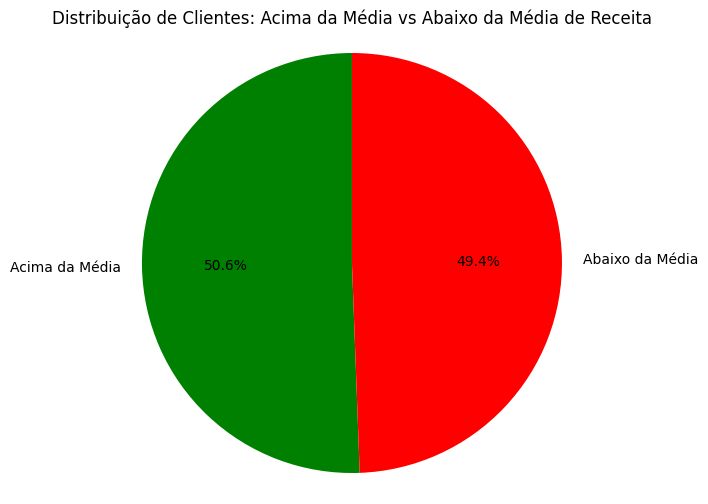

In [1082]:
receita_por_clientes = vendas_df.groupby('Nome Completo')['Receita'].sum().reset_index()
media_receita = receita_por_clientes['Receita'].mean()
receita_por_clientes['Categoria'] = receita_por_clientes['Receita'].apply(lambda receita: 'Acima da Média' if receita > media_receita else 'Abaixo da Média')
contagem_categoria = receita_por_clientes['Categoria'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(contagem_categoria, labels=contagem_categoria.index, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('Distribuição de Clientes: Acima da Média vs Abaixo da Média de Receita')
plt.axis('equal')  # Assegura que o gráfico seja um círculo
plt.show()

#### Resumo dos Resultados - Distribuição de Clientes: Acima da Média vs Abaixo da Média de Receita 

A análise dos clientes com base na receita revela uma distribuição quase equilibrada entre aqueles que estão **Acima da Média** e **Abaixo da Média**. Com **19.639 clientes** (cerca de **50,6%**) gerando receita acima da média e **19.182 clientes** (aproximadamente **49,4%**) abaixo da média, a diferença entre as duas categorias é relativamente pequena. Isso sugere que, embora existam clientes de alto desempenho, há uma grande oportunidade de melhorar a receita de um número significativo de clientes que estão abaixo da média, através de estratégias de marketing ou ofertas personalizadas, para equilibrar ainda mais essa distribuição e aumentar o engajamento.